**Importing the libraries**

In [33]:
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import json
import glob
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

import scipy.signal
import pandas as pd
from scipy.signal import find_peaks

import numpy as np

In [34]:
final_df1 = pd.read_csv('D:\PIP\Data\Processed Data\model_1_data.csv' , index_col =0)

In [35]:
elimination_df = pd.read_csv('D:\PIP\Data\Processed Data\model_2_data.csv', index_col =0)

In [36]:
elimination_df['Label'].value_counts()

1    6610
0    2316
Name: Label, dtype: int64

In [10]:
final_df1.isna().sum()

Event_ID                   0
mean_of_sum                0
min_of_sum                 0
max_of_sum                 0
median_of_sum              0
variance_of_sum            1
activity_time              0
std_of_sum                 1
rms_of_sum                 0
crest_factor               0
no_of_peaks                0
PSD_0_to_5Hz_max           0
PSD_0_to_5Hz_min           0
PSD_0_to_5Hz_median        0
PSD_5_to_10Hz_max          0
PSD_5_to_10Hz_min          1
PSD_5_to_10Hz_median       1
PSD_10_to_15Hz_max         2
PSD_10_to_15Hz_min         2
PSD_10_to_15Hz_median      2
PSD_15_to_20Hz_max         1
PSD_15_to_20Hz_min         1
PSD_15_to_20Hz_median      1
Label                      0
Cat_Name                 246
Label E/NE                 0
Range_of_sum               0
dtype: int64

In [11]:
elimination_df.isna().sum()

Event_ID                   0
mean_of_sum                0
min_of_sum                 0
max_of_sum                 0
median_of_sum              0
variance_of_sum            0
activity_time              0
std_of_sum                 0
rms_of_sum                 0
crest_factor               0
no_of_peaks                0
PSD_0_to_5Hz_max           0
PSD_0_to_5Hz_min           0
PSD_0_to_5Hz_median        0
PSD_5_to_10Hz_max          0
PSD_5_to_10Hz_min          0
PSD_5_to_10Hz_median       0
PSD_10_to_15Hz_max         0
PSD_10_to_15Hz_min         0
PSD_10_to_15Hz_median      0
PSD_15_to_20Hz_max         0
PSD_15_to_20Hz_min         0
PSD_15_to_20Hz_median      0
Label                      0
Cat_Name                 166
Label E/NE                 0
Range_of_sum               0
dtype: int64

In [12]:
# dropping null values from the model dataframe for model 1

In [13]:
final_df1 = final_df1.dropna()

In [14]:
final_df1.shape

(12827, 27)

In [15]:
# dropping null values from the model dataframe for model 2

In [16]:
elimination_df = elimination_df.dropna()

In [17]:
elimination_df.shape

(8760, 27)

In [18]:
### Creating the train, test and validate split

final_df1 = final_df1.sample(frac = 1, random_state = 101)

### Keeping first 60% rows for training, next 20% for validation and last 20% for testing sets.

train = final_df1[:int(len(final_df1)*0.6)]
validate = final_df1[int(len(final_df1)*0.6):int(len(final_df1)*0.8)]
test = final_df1[int(len(final_df1)*0.8):]

print(train.shape)
print(validate.shape)
print(test.shape)

(7696, 27)
(2565, 27)
(2566, 27)


In [19]:
### Separating the target column from the three datasets in X_data and y_data format.

X_train = train[['mean_of_sum','min_of_sum','max_of_sum','median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'no_of_peaks',
       'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min', 'PSD_0_to_5Hz_median',
       'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min', 'PSD_5_to_10Hz_median',
       'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min', 'PSD_10_to_15Hz_median',
       'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min', 'PSD_15_to_20Hz_median']]
y_train = train['Label E/NE']

In [20]:
X_validate = validate[['mean_of_sum','min_of_sum','max_of_sum','median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'no_of_peaks',
       'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min', 'PSD_0_to_5Hz_median',
       'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min', 'PSD_5_to_10Hz_median',
       'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min', 'PSD_10_to_15Hz_median',
       'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min', 'PSD_15_to_20Hz_median']]
y_validate = validate['Label E/NE']

In [21]:
X_test = test[['mean_of_sum','min_of_sum','max_of_sum','median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'no_of_peaks',
       'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min', 'PSD_0_to_5Hz_median',
       'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min', 'PSD_5_to_10Hz_median',
       'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min', 'PSD_10_to_15Hz_median',
       'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min', 'PSD_15_to_20Hz_median']]
y_test = test['Label E/NE']

In [22]:
y_test.value_counts()

1    1744
0     822
Name: Label E/NE, dtype: int64

**Decision Tree**

In [23]:
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [26]:
X = final_df1[['mean_of_sum','min_of_sum','max_of_sum','median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'no_of_peaks',
       'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min', 'PSD_0_to_5Hz_median',
       'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min', 'PSD_5_to_10Hz_median',
       'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min', 'PSD_10_to_15Hz_median',
       'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min', 'PSD_15_to_20Hz_median']].values
y = final_df1['Label E/NE'].values

In [27]:
### Creating the train, test and validate split

final_df1 = final_df1.sample(frac = 1, random_state = 101)

### Keeping first 60% rows for training, next 20% for validation and last 20% for testing sets.

train = final_df1[:int(len(final_df1)*0.6)]
validate = final_df1[int(len(final_df1)*0.6):int(len(final_df1)*0.8)]
test = final_df1[int(len(final_df1)*0.8):]

print(train.shape)
print(validate.shape)
print(test.shape)

(7696, 27)
(2565, 27)
(2566, 27)


In [28]:
### Separating the target column from the three datasets in X_data and y_data format.

X_train = train[['mean_of_sum','min_of_sum','max_of_sum','median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'no_of_peaks',
       'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min', 'PSD_0_to_5Hz_median',
       'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min', 'PSD_5_to_10Hz_median',
       'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min', 'PSD_10_to_15Hz_median',
       'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min', 'PSD_15_to_20Hz_median']]
y_train = train['Label E/NE']

In [29]:
X_validate = validate[['mean_of_sum','min_of_sum','max_of_sum','median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'no_of_peaks',
       'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min', 'PSD_0_to_5Hz_median',
       'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min', 'PSD_5_to_10Hz_median',
       'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min', 'PSD_10_to_15Hz_median',
       'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min', 'PSD_15_to_20Hz_median']]
y_validate = validate['Label E/NE']

In [30]:
X_test = test[['mean_of_sum','min_of_sum','max_of_sum','median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'no_of_peaks',
       'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min', 'PSD_0_to_5Hz_median',
       'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min', 'PSD_5_to_10Hz_median',
       'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min', 'PSD_10_to_15Hz_median',
       'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min', 'PSD_15_to_20Hz_median']]
y_test = test['Label E/NE']

In [31]:
def error_metrics_DT(actual, predicted, X_data):
    print('Accuracy % age: ' + str(np.round(accuracy_score(actual, predicted)*100, 2)))
    print('ROC-AUC Score: ' + str(np.round(roc_auc_score(actual, classifier_dt.predict_proba(X_data)[:,1]),3)))
    print('\nClassification Report:')
    print(classification_report(actual, predicted))
    print('\nConfusion Matrix:')
    print(confusion_matrix(actual, predicted))
    return "Done"



Training
------------------------------------------------------------
Accuracy % age: 100.0
ROC-AUC Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2440
           1       1.00      1.00      1.00      5256

    accuracy                           1.00      7696
   macro avg       1.00      1.00      1.00      7696
weighted avg       1.00      1.00      1.00      7696


Confusion Matrix:
[[2440    0]
 [   0 5256]]

 ROC-AUC Curve for the training set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


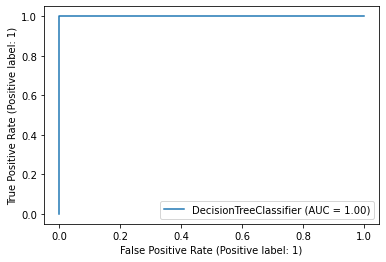

In [32]:
### Training Dataset metrics and ROC-AUC Curve

classifier_dt.fit(X_train, y_train)

print("\nTraining\n------------------------------------------------------------")
y_train_pred = classifier_dt.predict(X_train)
error_metrics_DT(y_train, y_train_pred, X_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(classifier_dt, X_train, y_train)
plt.show()


Validation
------------------------------------------------------------
Accuracy % age: 77.54
ROC-AUC Score: 0.744

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.65      0.66       843
           1       0.83      0.84      0.83      1722

    accuracy                           0.78      2565
   macro avg       0.75      0.74      0.74      2565
weighted avg       0.77      0.78      0.78      2565


Confusion Matrix:
[[ 549  294]
 [ 282 1440]]

 ROC-AUC Curve for the validation set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


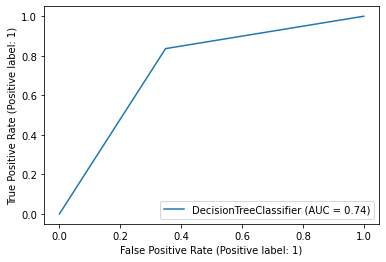

In [34]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y_validate_pred = classifier_dt.predict(X_validate)
error_metrics_DT(y_validate, y_validate_pred, X_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(classifier_dt, X_validate, y_validate)
plt.show()


Testing
------------------------------------------------------------
Accuracy % age: 77.59
ROC-AUC Score: 0.742

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       784
           1       0.85      0.83      0.84      1782

    accuracy                           0.78      2566
   macro avg       0.74      0.74      0.74      2566
weighted avg       0.78      0.78      0.78      2566


Confusion Matrix:
[[ 513  271]
 [ 304 1478]]

 ROC-AUC Curve for the testing set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


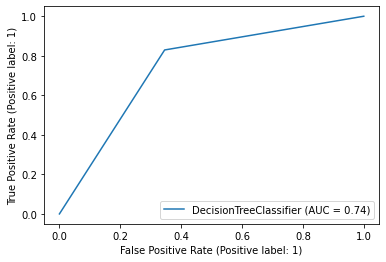

In [35]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y_test_pred = classifier_dt.predict(X_test)
error_metrics_DT(y_test, y_test_pred, X_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(classifier_dt, X_test, y_test)
plt.show()



Training
------------------------------------------------------------
Accuracy % age: 100.0
ROC-AUC Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2440
           1       1.00      1.00      1.00      5256

    accuracy                           1.00      7696
   macro avg       1.00      1.00      1.00      7696
weighted avg       1.00      1.00      1.00      7696


Confusion Matrix:
[[2440    0]
 [   0 5256]]

 ROC-AUC Curve for the training set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


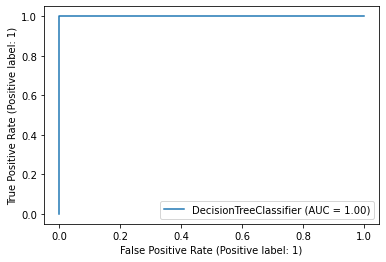

In [36]:
### Trying the same with probability thresholds as 0.4 and 0.6.

### threshold = 0.4

### Training Dataset metrics and ROC-AUC Curve

classifier_dt.fit(X_train, y_train)

print("\nTraining\n------------------------------------------------------------")
y_train_probability = classifier_dt.predict_proba(X_train)[:,1]
y_train_pred = np.where(y_train_probability >= 0.4, 1, 0)
error_metrics_DT(y_train, y_train_pred, X_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(classifier_dt, X_train, y_train)
plt.show()


Validation
------------------------------------------------------------
Accuracy % age: 77.54
ROC-AUC Score: 0.744

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.65      0.66       843
           1       0.83      0.84      0.83      1722

    accuracy                           0.78      2565
   macro avg       0.75      0.74      0.74      2565
weighted avg       0.77      0.78      0.78      2565


Confusion Matrix:
[[ 549  294]
 [ 282 1440]]

 ROC-AUC Curve for the validation set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


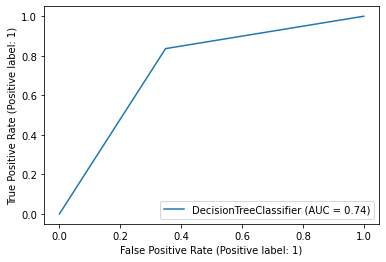

In [37]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y_validate_probabillity = classifier_dt.predict_proba(X_validate)[:,1]
y_validate_pred = np.where(y_validate_probabillity >= 0.4, 1, 0)
error_metrics_DT(y_validate, y_validate_pred, X_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(classifier_dt, X_validate, y_validate)
plt.show()


Testing
------------------------------------------------------------
Accuracy % age: 77.59
ROC-AUC Score: 0.742

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       784
           1       0.85      0.83      0.84      1782

    accuracy                           0.78      2566
   macro avg       0.74      0.74      0.74      2566
weighted avg       0.78      0.78      0.78      2566


Confusion Matrix:
[[ 513  271]
 [ 304 1478]]

 ROC-AUC Curve for the testing set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


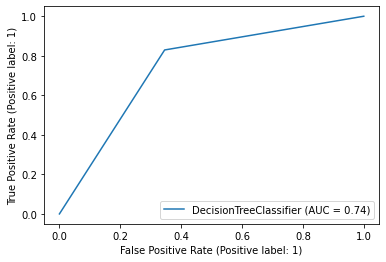

In [38]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y_test_probabillity = classifier_dt.predict_proba(X_test)[:,1]
y_test_pred = np.where(y_test_probabillity >= 0.4, 1, 0)
y_test_pred = classifier_dt.predict(X_test)
error_metrics_DT(y_test, y_test_pred, X_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(classifier_dt, X_test, y_test)
plt.show()


Training
------------------------------------------------------------
Accuracy % age: 100.0
ROC-AUC Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2440
           1       1.00      1.00      1.00      5256

    accuracy                           1.00      7696
   macro avg       1.00      1.00      1.00      7696
weighted avg       1.00      1.00      1.00      7696


Confusion Matrix:
[[2440    0]
 [   0 5256]]

 ROC-AUC Curve for the training set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


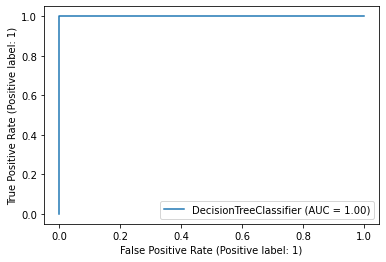

In [39]:
### threshold = 0.6

### Training Dataset metrics and ROC-AUC Curve

classifier_dt.fit(X_train, y_train)

print("\nTraining\n------------------------------------------------------------")
y_train_probabillity = classifier_dt.predict_proba(X_train)[:,1]
y_train_pred = np.where(y_train_probabillity >= 0.6, 1, 0)
error_metrics_DT(y_train, y_train_pred, X_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(classifier_dt, X_train, y_train)
plt.show()


Validation
------------------------------------------------------------
Accuracy % age: 77.54
ROC-AUC Score: 0.744

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.65      0.66       843
           1       0.83      0.84      0.83      1722

    accuracy                           0.78      2565
   macro avg       0.75      0.74      0.74      2565
weighted avg       0.77      0.78      0.78      2565


Confusion Matrix:
[[ 549  294]
 [ 282 1440]]

 ROC-AUC Curve for the validation set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


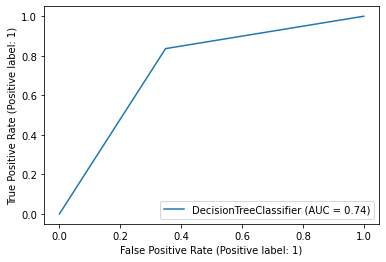

In [40]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y_validate_probabillity = classifier_dt.predict_proba(X_validate)[:,1]
y_validate_pred = np.where(y_validate_probabillity >= 0.6, 1, 0)
error_metrics_DT(y_validate, y_validate_pred, X_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(classifier_dt, X_validate, y_validate)
plt.show()


Testing
------------------------------------------------------------
Accuracy % age: 77.59
ROC-AUC Score: 0.742

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       784
           1       0.85      0.83      0.84      1782

    accuracy                           0.78      2566
   macro avg       0.74      0.74      0.74      2566
weighted avg       0.78      0.78      0.78      2566


Confusion Matrix:
[[ 513  271]
 [ 304 1478]]

 ROC-AUC Curve for the testing set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


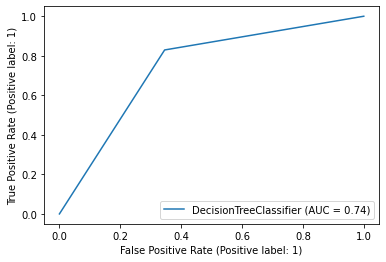

In [41]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y_test_probability = classifier_dt.predict_proba(X_test)[:,1]
y_test_pred = np.where(y_test_probability >= 0.6, 1, 0)
error_metrics_DT(y_test, y_test_pred, X_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(classifier_dt, X_test, y_test)
plt.show()

**Using Standard Scalar**

In [42]:
sc = StandardScaler()
X1_train = sc.fit_transform(X_train)
X1_test = sc.transform(X_test)
X1_validate = sc.transform(X_validate)



Training
------------------------------------------------------------
Accuracy % age: 100.0
ROC-AUC Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2440
           1       1.00      1.00      1.00      5256

    accuracy                           1.00      7696
   macro avg       1.00      1.00      1.00      7696
weighted avg       1.00      1.00      1.00      7696


Confusion Matrix:
[[2440    0]
 [   0 5256]]

 ROC-AUC Curve for the training set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


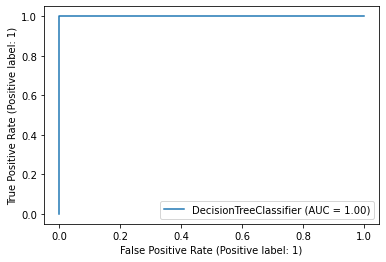

In [43]:
### Training Dataset metrics and ROC-AUC Curve

classifier_dt.fit(X1_train, y_train)

print("\nTraining\n------------------------------------------------------------")
y1_train_pred = classifier_dt.predict(X1_train)
error_metrics_DT(y_train, y1_train_pred, X1_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(classifier_dt, X1_train, y_train)
plt.show()


Validation on scaled validation set
------------------------------------------------------------
Accuracy % age: 78.32
ROC-AUC Score: 0.754

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       843
           1       0.84      0.84      0.84      1722

    accuracy                           0.78      2565
   macro avg       0.75      0.75      0.75      2565
weighted avg       0.78      0.78      0.78      2565


Confusion Matrix:
[[ 563  280]
 [ 276 1446]]

 ROC-AUC Curve for the validation set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


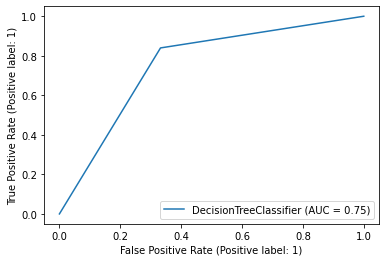

In [44]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation on scaled validation set\n------------------------------------------------------------")
y1_validate_pred = classifier_dt.predict(X1_validate)
error_metrics_DT(y_validate, y1_validate_pred, X1_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(classifier_dt, X1_validate, y_validate)
plt.show()


Testing test(scaled)
------------------------------------------------------------
Accuracy % age: 77.44
ROC-AUC Score: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       784
           1       0.84      0.83      0.84      1782

    accuracy                           0.77      2566
   macro avg       0.73      0.74      0.74      2566
weighted avg       0.78      0.77      0.78      2566


Confusion Matrix:
[[ 512  272]
 [ 307 1475]]

 ROC-AUC Curve for the testing set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


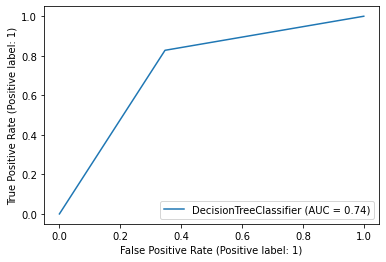

In [45]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting test(scaled)\n------------------------------------------------------------")
y1_test_pred = classifier_dt.predict(X1_test)
error_metrics_DT(y_test, y1_test_pred, X1_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(classifier_dt, X1_test, y_test)
plt.show()


Training
------------------------------------------------------------
Accuracy % age: 100.0
ROC-AUC Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2440
           1       1.00      1.00      1.00      5256

    accuracy                           1.00      7696
   macro avg       1.00      1.00      1.00      7696
weighted avg       1.00      1.00      1.00      7696


Confusion Matrix:
[[2440    0]
 [   0 5256]]

 ROC-AUC Curve for the training set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


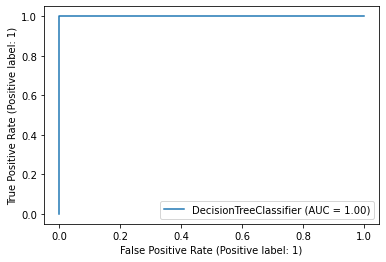

In [46]:
### Trying the same with probability thresholds as 0.4 and 0.6.
### threshold = 0.4
### Training Dataset metrics and ROC-AUC Curve

classifier_dt.fit(X1_train, y_train)

print("\nTraining\n------------------------------------------------------------")
y1_train_probability = classifier_dt.predict_proba(X1_train)[:,1]
y1_train_pred = np.where(y1_train_probability >= 0.4, 1, 0)
error_metrics_DT(y_train, y1_train_pred, X1_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(classifier_dt, X1_train, y_train)
plt.show()


Validation
------------------------------------------------------------
Accuracy % age: 78.32
ROC-AUC Score: 0.754

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       843
           1       0.84      0.84      0.84      1722

    accuracy                           0.78      2565
   macro avg       0.75      0.75      0.75      2565
weighted avg       0.78      0.78      0.78      2565


Confusion Matrix:
[[ 563  280]
 [ 276 1446]]

 ROC-AUC Curve for the validation set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


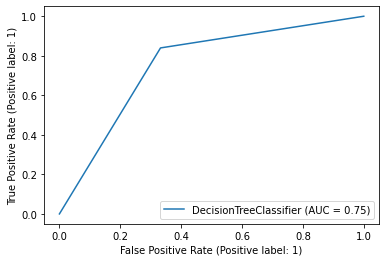

In [47]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y1_validate_probabillity = classifier_dt.predict_proba(X1_validate)[:,1]
y1_validate_pred = np.where(y1_validate_probabillity >= 0.4, 1, 0)
error_metrics_DT(y_validate, y1_validate_pred, X1_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(classifier_dt, X1_validate, y_validate)
plt.show()


Testing
------------------------------------------------------------
Accuracy % age: 77.44
ROC-AUC Score: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       784
           1       0.84      0.83      0.84      1782

    accuracy                           0.77      2566
   macro avg       0.73      0.74      0.74      2566
weighted avg       0.78      0.77      0.78      2566


Confusion Matrix:
[[ 512  272]
 [ 307 1475]]

 ROC-AUC Curve for the testing set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


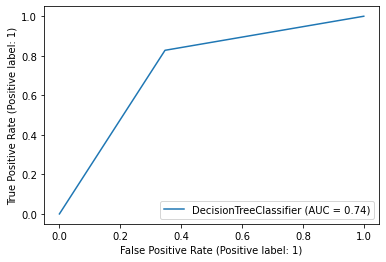

In [48]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y1_test_probabillity = classifier_dt.predict_proba(X1_test)[:,1]
y1_test_pred = np.where(y1_test_probabillity >= 0.4, 1, 0)
y1_test_pred = classifier_dt.predict(X1_test)
error_metrics_DT(y_test, y1_test_pred, X1_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(classifier_dt, X1_test, y_test)
plt.show()

In [49]:
### threshold = 0.6


Training
------------------------------------------------------------
Accuracy % age: 100.0
ROC-AUC Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2440
           1       1.00      1.00      1.00      5256

    accuracy                           1.00      7696
   macro avg       1.00      1.00      1.00      7696
weighted avg       1.00      1.00      1.00      7696


Confusion Matrix:
[[2440    0]
 [   0 5256]]

 ROC-AUC Curve for the training set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


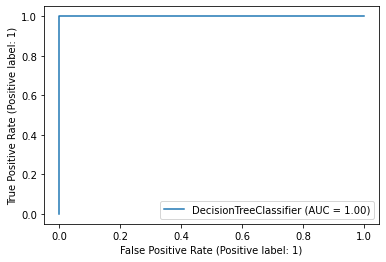

In [50]:
### Training Dataset metrics and ROC-AUC Curve

classifier_dt.fit(X1_train, y_train) 
print("\nTraining\n------------------------------------------------------------")
y1_train_probabillity = classifier_dt.predict_proba(X1_train)[:,1]
y1_train_pred = np.where(y1_train_probabillity >= 0.6, 1, 0)
error_metrics_DT(y_train, y1_train_pred, X1_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(classifier_dt, X1_train, y_train)
plt.show()



Validation
------------------------------------------------------------
Accuracy % age: 78.32
ROC-AUC Score: 0.754

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       843
           1       0.84      0.84      0.84      1722

    accuracy                           0.78      2565
   macro avg       0.75      0.75      0.75      2565
weighted avg       0.78      0.78      0.78      2565


Confusion Matrix:
[[ 563  280]
 [ 276 1446]]

 ROC-AUC Curve for the validation set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


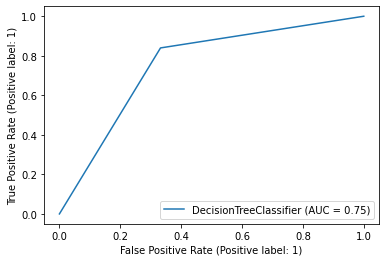

In [51]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y1_validate_probabillity = classifier_dt.predict_proba(X1_validate)[:,1]
y1_validate_pred = np.where(y1_validate_probabillity >= 0.6, 1, 0)
error_metrics_DT(y_validate, y1_validate_pred, X1_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(classifier_dt, X1_validate, y_validate)
plt.show()


Testing
------------------------------------------------------------
Accuracy % age: 77.44
ROC-AUC Score: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       784
           1       0.84      0.83      0.84      1782

    accuracy                           0.77      2566
   macro avg       0.73      0.74      0.74      2566
weighted avg       0.78      0.77      0.78      2566


Confusion Matrix:
[[ 512  272]
 [ 307 1475]]

 ROC-AUC Curve for the testing set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


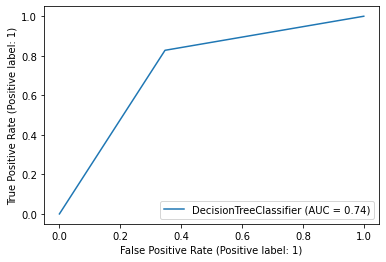

In [52]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y1_test_probability = classifier_dt.predict_proba(X1_test)[:,1]
y1_test_pred = np.where(y1_test_probability >= 0.6, 1, 0)
error_metrics_DT(y_test, y1_test_pred, X1_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(classifier_dt, X1_test, y_test)
plt.show()


**Decision Tree**

**Model building using Decision Tree(Second model i.e prediction of urination and defecation)**

In [53]:
X2 = elimination_df[['mean_of_sum','min_of_sum','max_of_sum','median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'no_of_peaks',
       'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min', 'PSD_0_to_5Hz_median',
       'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min', 'PSD_5_to_10Hz_median',
       'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min', 'PSD_10_to_15Hz_median',
       'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min', 'PSD_15_to_20Hz_median']].values
y2 = elimination_df['Label'].values


In [54]:
### Creating the train, test and validate split

elimination_df = elimination_df.sample(frac = 1, random_state = 101)

### Keeping first 60% rows for training, next 20% for validation and last 20% for testing sets.

train = elimination_df[:int(len(elimination_df)*0.6)]
validate = elimination_df[int(len(elimination_df)*0.6):int(len(elimination_df)*0.8)]
test = elimination_df[int(len(elimination_df)*0.8):]

print(train.shape)
print(validate.shape)
print(test.shape)


(5256, 28)
(1752, 28)
(1752, 28)


In [55]:
### Separating the target column from the three datasets in X_data and y_data format.

X2_train = train[['mean_of_sum','min_of_sum','max_of_sum','median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'no_of_peaks',
       'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min', 'PSD_0_to_5Hz_median',
       'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min', 'PSD_5_to_10Hz_median',
       'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min', 'PSD_10_to_15Hz_median',
       'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min', 'PSD_15_to_20Hz_median']].values
y2_train = train['Label'].values


In [56]:
X2_validate = validate[['mean_of_sum','min_of_sum','max_of_sum','median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'no_of_peaks',
       'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min', 'PSD_0_to_5Hz_median',
       'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min', 'PSD_5_to_10Hz_median',
       'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min', 'PSD_10_to_15Hz_median',
       'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min', 'PSD_15_to_20Hz_median']].values
y2_validate = validate['Label'].values


In [57]:
X2_test = test[['mean_of_sum','min_of_sum','max_of_sum','median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'no_of_peaks',
       'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min', 'PSD_0_to_5Hz_median',
       'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min', 'PSD_5_to_10Hz_median',
       'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min', 'PSD_10_to_15Hz_median',
       'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min', 'PSD_15_to_20Hz_median']].values
y2_test = test['Label'].values


In [58]:
def error_metrics_DT2(actual, predicted, X_data):
    print('Accuracy % age: ' + str(np.round(accuracy_score(actual, predicted)*100, 2)))
    print('ROC-AUC Score: ' + str(np.round(roc_auc_score(actual, classifier_DT2.predict_proba(X_data)[:,1]),3)))
    print('\nClassification Report:')
    print(classification_report(actual, predicted))
    print('\nConfusion Matrix:')
    print(confusion_matrix(actual, predicted))
    return "Done"


Training
------------------------------------------------------------
Accuracy % age: 100.0
ROC-AUC Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1373
           1       1.00      1.00      1.00      3883

    accuracy                           1.00      5256
   macro avg       1.00      1.00      1.00      5256
weighted avg       1.00      1.00      1.00      5256


Confusion Matrix:
[[1373    0]
 [   0 3883]]

 ROC-AUC Curve for the training set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


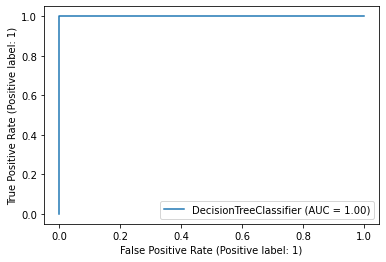

In [59]:
### Training Dataset metrics and ROC-AUC Curve
classifier_DT2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_DT2.fit(X2_train, y2_train)

print("\nTraining\n------------------------------------------------------------")
y2_train_pred = classifier_DT2.predict(X2_train)
error_metrics_DT2(y2_train, y2_train_pred, X2_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(classifier_DT2, X2_train, y2_train)
plt.show()


Validation
------------------------------------------------------------
Accuracy % age: 77.34
ROC-AUC Score: 0.704

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56       447
           1       0.85      0.85      0.85      1305

    accuracy                           0.77      1752
   macro avg       0.70      0.70      0.70      1752
weighted avg       0.77      0.77      0.77      1752


Confusion Matrix:
[[ 251  196]
 [ 201 1104]]

 ROC-AUC Curve for the validation set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


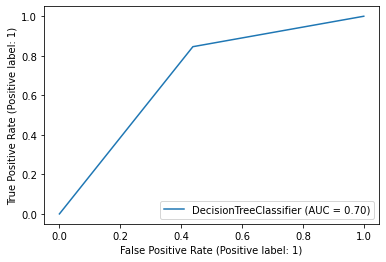

In [60]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y2_validate_pred = classifier_DT2.predict(X2_validate)
error_metrics_DT2(y2_validate, y2_validate_pred, X2_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(classifier_DT2, X2_validate, y2_validate)
plt.show()


Testing
------------------------------------------------------------
Accuracy % age: 78.42
ROC-AUC Score: 0.728

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.61      0.59       452
           1       0.86      0.84      0.85      1300

    accuracy                           0.78      1752
   macro avg       0.72      0.73      0.72      1752
weighted avg       0.79      0.78      0.79      1752


Confusion Matrix:
[[ 277  175]
 [ 203 1097]]

 ROC-AUC Curve for the testing set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


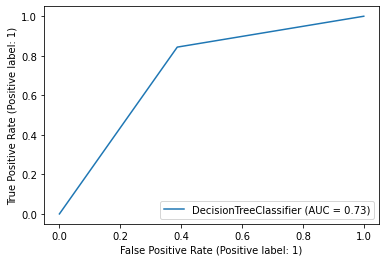

In [61]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y2_test_pred = classifier_DT2.predict(X2_test)
error_metrics_DT2(y2_test, y2_test_pred, X2_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(classifier_DT2, X2_test, y2_test)
plt.show()


In [62]:
### Trying the same with probability thresholds as 0.4 and 0.6.

### threshold = 0.4


Training
------------------------------------------------------------
Accuracy % age: 100.0
ROC-AUC Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1373
           1       1.00      1.00      1.00      3883

    accuracy                           1.00      5256
   macro avg       1.00      1.00      1.00      5256
weighted avg       1.00      1.00      1.00      5256


Confusion Matrix:
[[1373    0]
 [   0 3883]]

 ROC-AUC Curve for the training set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


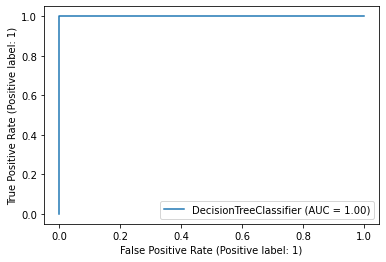

In [63]:
print("\nTraining\n------------------------------------------------------------")
y2_train_probability = classifier_DT2.predict_proba(X2_train)[:,1]
y2_train_pred = np.where(y2_train_probability >= 0.4, 1, 0)
error_metrics_DT2(y2_train, y2_train_pred, X2_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(classifier_DT2, X2_train, y2_train)
plt.show()


Validation
------------------------------------------------------------
Accuracy % age: 77.34
ROC-AUC Score: 0.704

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56       447
           1       0.85      0.85      0.85      1305

    accuracy                           0.77      1752
   macro avg       0.70      0.70      0.70      1752
weighted avg       0.77      0.77      0.77      1752


Confusion Matrix:
[[ 251  196]
 [ 201 1104]]

 ROC-AUC Curve for the validation set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


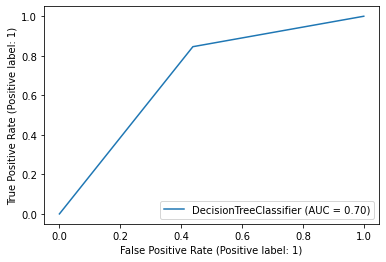

In [64]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y2_validate_probabillity = classifier_DT2.predict_proba(X2_validate)[:,1]
y2_validate_pred = np.where(y2_validate_probabillity >= 0.4, 1, 0)
error_metrics_DT2(y2_validate, y2_validate_pred, X2_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(classifier_DT2, X2_validate, y2_validate)
plt.show()



Testing
------------------------------------------------------------
Accuracy % age: 78.42
ROC-AUC Score: 0.728

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.61      0.59       452
           1       0.86      0.84      0.85      1300

    accuracy                           0.78      1752
   macro avg       0.72      0.73      0.72      1752
weighted avg       0.79      0.78      0.79      1752


Confusion Matrix:
[[ 277  175]
 [ 203 1097]]

 ROC-AUC Curve for the testing set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


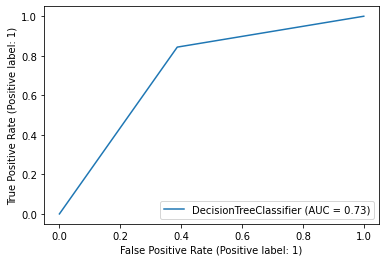

In [65]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y2_test_probabillity = classifier_DT2.predict_proba(X2_test)[:,1]
y2_test_pred = np.where(y2_test_probabillity >= 0.4, 1, 0)
y2_test_pred = classifier_DT2.predict(X2_test)
error_metrics_DT2(y2_test, y2_test_pred, X2_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(classifier_DT2, X2_test, y2_test)
plt.show()



Training
------------------------------------------------------------
Accuracy % age: 100.0
ROC-AUC Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1373
           1       1.00      1.00      1.00      3883

    accuracy                           1.00      5256
   macro avg       1.00      1.00      1.00      5256
weighted avg       1.00      1.00      1.00      5256


Confusion Matrix:
[[1373    0]
 [   0 3883]]

 ROC-AUC Curve for the training set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


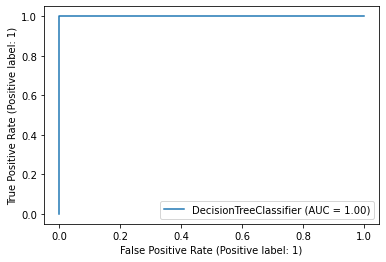

In [66]:
### threshold = 0.6

### Training Dataset metrics and ROC-AUC Curve

print("\nTraining\n------------------------------------------------------------")
y2_train_probabillity = classifier_DT2.predict_proba(X2_train)[:,1]
y2_train_pred = np.where(y2_train_probabillity >= 0.6, 1, 0)
error_metrics_DT2(y2_train, y2_train_pred, X2_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(classifier_DT2, X2_train, y2_train)
plt.show()


Validation
------------------------------------------------------------
Accuracy % age: 77.34
ROC-AUC Score: 0.704

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56       447
           1       0.85      0.85      0.85      1305

    accuracy                           0.77      1752
   macro avg       0.70      0.70      0.70      1752
weighted avg       0.77      0.77      0.77      1752


Confusion Matrix:
[[ 251  196]
 [ 201 1104]]

 ROC-AUC Curve for the validation set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


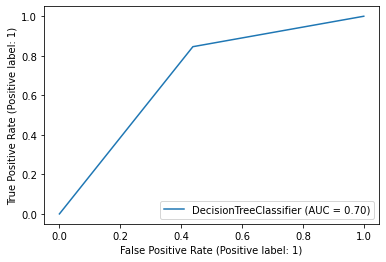

In [67]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y2_validate_probabillity = classifier_DT2.predict_proba(X2_validate)[:,1]
y2_validate_pred = np.where(y2_validate_probabillity >= 0.6, 1, 0)
error_metrics_DT2(y2_validate, y2_validate_pred, X2_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(classifier_DT2, X2_validate, y2_validate)
plt.show()


Testing
------------------------------------------------------------
Accuracy % age: 78.42
ROC-AUC Score: 0.728

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.61      0.59       452
           1       0.86      0.84      0.85      1300

    accuracy                           0.78      1752
   macro avg       0.72      0.73      0.72      1752
weighted avg       0.79      0.78      0.79      1752


Confusion Matrix:
[[ 277  175]
 [ 203 1097]]

 ROC-AUC Curve for the testing set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


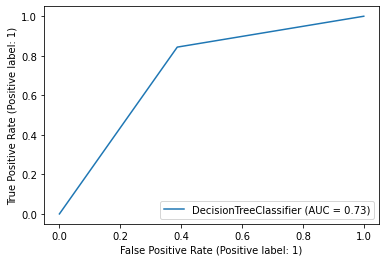

In [68]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y2_test_probability = classifier_DT2.predict_proba(X2_test)[:,1]
y2_test_pred = np.where(y2_test_probability >= 0.6, 1, 0)
error_metrics_DT2(y2_test, y2_test_pred, X2_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(classifier_DT2, X2_test, y2_test)
plt.show()

**Using standard scalar**

In [69]:
X22_train = sc.fit_transform(X2_train)
X22_test = sc.transform(X2_test)
X22_validate = sc.transform(X2_validate)



Training
------------------------------------------------------------
Accuracy % age: 100.0
ROC-AUC Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1373
           1       1.00      1.00      1.00      3883

    accuracy                           1.00      5256
   macro avg       1.00      1.00      1.00      5256
weighted avg       1.00      1.00      1.00      5256


Confusion Matrix:
[[1373    0]
 [   0 3883]]

 ROC-AUC Curve for the training set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


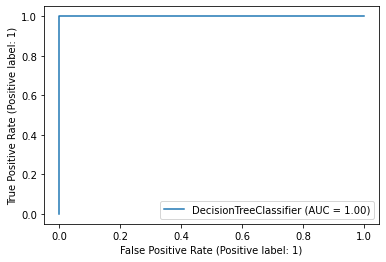

In [70]:
### Training Dataset metrics and ROC-AUC Curve

classifier_DT2.fit(X22_train, y2_train)

print("\nTraining\n------------------------------------------------------------")
y22_train_pred = classifier_DT2.predict(X22_train)
error_metrics_DT2(y2_train, y22_train_pred, X22_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(classifier_DT2, X22_train, y2_train)
plt.show()


Validation on scaled validation set
------------------------------------------------------------
Accuracy % age: 76.31
ROC-AUC Score: 0.217

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.55      0.54       447
           1       0.84      0.84      0.84      1305

    accuracy                           0.76      1752
   macro avg       0.69      0.69      0.69      1752
weighted avg       0.77      0.76      0.76      1752


Confusion Matrix:
[[ 246  201]
 [ 214 1091]]

 ROC-AUC Curve for the validation set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


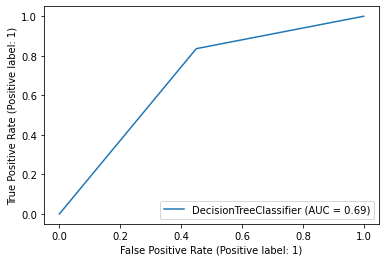

In [71]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation on scaled validation set\n------------------------------------------------------------")
y22_validate_pred = classifier_DT2.predict(X22_validate)
error_metrics(y2_validate, y22_validate_pred, X22_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(classifier_DT2, X22_validate, y2_validate)
plt.show()


Testing test(scaled)
------------------------------------------------------------
Accuracy % age: 77.0
ROC-AUC Score: 0.717

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.61      0.58       452
           1       0.86      0.83      0.84      1300

    accuracy                           0.77      1752
   macro avg       0.70      0.72      0.71      1752
weighted avg       0.78      0.77      0.77      1752


Confusion Matrix:
[[ 274  178]
 [ 225 1075]]

 ROC-AUC Curve for the testing set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


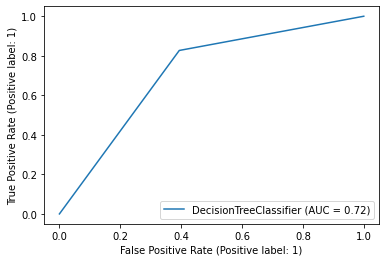

In [72]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting test(scaled)\n------------------------------------------------------------")
y22_test_pred = classifier_DT2.predict(X22_test)
error_metrics_DT2(y2_test, y22_test_pred, X22_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(classifier_DT2, X22_test, y2_test)
plt.show()



Training
------------------------------------------------------------
Accuracy % age: 100.0
ROC-AUC Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1373
           1       1.00      1.00      1.00      3883

    accuracy                           1.00      5256
   macro avg       1.00      1.00      1.00      5256
weighted avg       1.00      1.00      1.00      5256


Confusion Matrix:
[[1373    0]
 [   0 3883]]

 ROC-AUC Curve for the training set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


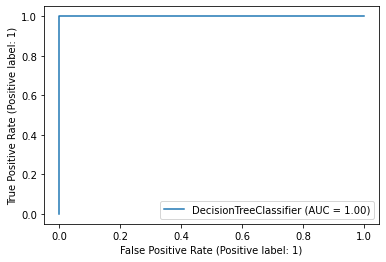

In [73]:
### threshold = 0.4

### Training Dataset metrics and ROC-AUC Curve

classifier_DT2.fit(X22_train, y2_train)

print("\nTraining\n------------------------------------------------------------")
y22_train_probability = classifier_DT2.predict_proba(X22_train)[:,1]
y22_train_pred = np.where(y22_train_probability >= 0.4, 1, 0)
error_metrics_DT2(y2_train, y22_train_pred, X22_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(classifier_DT2, X22_train, y2_train)
plt.show()


Validation
------------------------------------------------------------
Accuracy % age: 76.31
ROC-AUC Score: 0.693

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.55      0.54       447
           1       0.84      0.84      0.84      1305

    accuracy                           0.76      1752
   macro avg       0.69      0.69      0.69      1752
weighted avg       0.77      0.76      0.76      1752


Confusion Matrix:
[[ 246  201]
 [ 214 1091]]

 ROC-AUC Curve for the validation set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


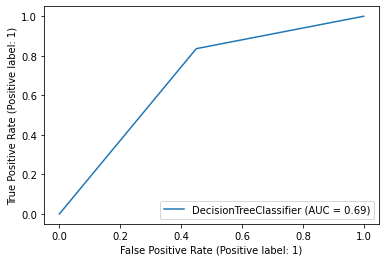

In [74]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y22_validate_probabillity = classifier_DT2.predict_proba(X22_validate)[:,1]
y22_validate_pred = np.where(y22_validate_probabillity >= 0.4, 1, 0)
error_metrics_DT2(y2_validate, y22_validate_pred, X22_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(classifier_DT2, X22_validate, y2_validate)
plt.show()



Testing
------------------------------------------------------------
Accuracy % age: 77.0
ROC-AUC Score: 0.717

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.61      0.58       452
           1       0.86      0.83      0.84      1300

    accuracy                           0.77      1752
   macro avg       0.70      0.72      0.71      1752
weighted avg       0.78      0.77      0.77      1752


Confusion Matrix:
[[ 274  178]
 [ 225 1075]]

 ROC-AUC Curve for the testing set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


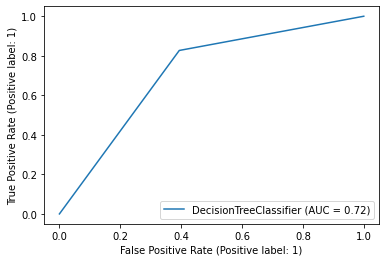

In [75]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y22_test_probabillity = classifier_DT2.predict_proba(X22_test)[:,1]
y22_test_pred = np.where(y22_test_probabillity >= 0.4, 1, 0)
y22_test_pred = classifier_DT2.predict(X22_test)
error_metrics_DT2(y2_test, y22_test_pred, X22_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(classifier_DT2, X22_test, y2_test)
plt.show()


Training
------------------------------------------------------------
Accuracy % age: 100.0
ROC-AUC Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1373
           1       1.00      1.00      1.00      3883

    accuracy                           1.00      5256
   macro avg       1.00      1.00      1.00      5256
weighted avg       1.00      1.00      1.00      5256


Confusion Matrix:
[[1373    0]
 [   0 3883]]

 ROC-AUC Curve for the training set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


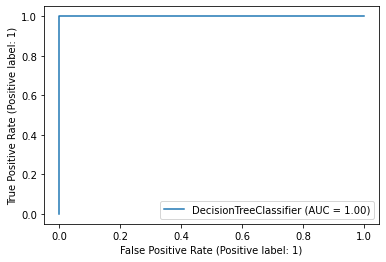

In [76]:
### threshold = 0.6

### Training Dataset metrics and ROC-AUC Curve

classifier_DT2.fit(X22_train, y2_train)

print("\nTraining\n------------------------------------------------------------")
y22_train_probabillity = classifier_DT2.predict_proba(X22_train)[:,1]
y22_train_pred = np.where(y22_train_probabillity >= 0.6, 1, 0)
error_metrics_DT2(y2_train, y22_train_pred, X22_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(classifier_DT2, X22_train, y2_train)
plt.show()


Validation
------------------------------------------------------------
Accuracy % age: 76.31
ROC-AUC Score: 0.693

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.55      0.54       447
           1       0.84      0.84      0.84      1305

    accuracy                           0.76      1752
   macro avg       0.69      0.69      0.69      1752
weighted avg       0.77      0.76      0.76      1752


Confusion Matrix:
[[ 246  201]
 [ 214 1091]]

 ROC-AUC Curve for the validation set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


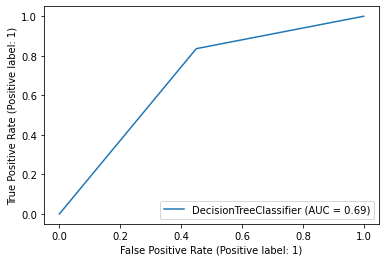

In [77]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y22_validate_probabillity = classifier_DT2.predict_proba(X22_validate)[:,1]
y22_validate_pred = np.where(y22_validate_probabillity >= 0.6, 1, 0)
error_metrics_DT2(y2_validate, y22_validate_pred, X22_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(classifier_DT2, X22_validate, y2_validate)
plt.show()



Testing
------------------------------------------------------------
Accuracy % age: 77.0
ROC-AUC Score: 0.717

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.61      0.58       452
           1       0.86      0.83      0.84      1300

    accuracy                           0.77      1752
   macro avg       0.70      0.72      0.71      1752
weighted avg       0.78      0.77      0.77      1752


Confusion Matrix:
[[ 274  178]
 [ 225 1075]]

 ROC-AUC Curve for the testing set


C:\Users\jaikrishna.shukla\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


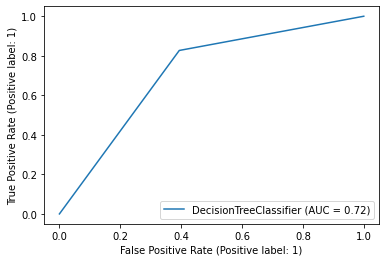

In [78]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y22_test_probability = classifier_DT2.predict_proba(X22_test)[:,1]
y22_test_pred = np.where(y22_test_probability >= 0.6, 1, 0)
error_metrics_DT2(y2_test, y22_test_pred, X22_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(classifier_DT2, X22_test, y2_test)
plt.show()
